# Problem Transformation

This notebook discusses Multi-label algorithm probelm transformation methods for the [academia.stackexchange.com](https://academia.stackexchange.com/) data dump.

## Table of Contents
* [Data import](#data_import)
* [Methods](#methods)

In [77]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from joblib import dump, load
from academia_tag_recommender.classifier import Classifier

RANDOM_STATE = 0

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<a id='data_import'/>

## Data import

In [ ]:
from academia_tag_recommender.test_train_data import get_X_reduced, get_y, get_test_train_data
from academia_tag_recommender.preprocessing_definition import PreprocessingDefinition

preprocessing = PreprocessingDefinition('tfidf', 'basic', 'basic', 'english', '1,1', 'TruncatedSVD')

X = get_X_reduced(preprocessing)
y = get_y()
X_train, X_test, y_train, y_test = get_test_train_data(X, y)

print(y_test.shape)

<a id='methods'/>

## Methods

Algorithms in scikit-learn suited for Multi-label problem transformation:
- [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
- [ExtraTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.ExtraTreeClassifier.html#sklearn.tree.ExtraTreeClassifier)
- [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
- [RadiusNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsClassifier.html#sklearn.neighbors.RadiusNeighborsClassifier)
- [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)
- [RidgeClassifierCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifierCV.html#sklearn.linear_model.RidgeClassifierCV)

Multi-label suport can be added to all Classifiers using.
- [MultioutputClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html#sklearn.multioutput.MultiOutputClassifier)

sklearn-multilabel:
- [Label Powerset](http://scikit.ml/api/skmultilearn.problem_transform.lp.html#skmultilearn.problem_transform.LabelPowerset)

In [3]:
clf_paths = []
def create_classifier(classifier):
    clf = Classifier(classifier, preprocessing)
    clf.fit(X_train, y_train)
    clf.score(X_test, y_test)
    path = clf.save()
    print(clf.training_time)
    clf.evaluation.print_stats()
    clf_paths.append(path)

**DecisionTreeClassifier**

In [4]:
from sklearn.tree import DecisionTreeClassifier

create_classifier(DecisionTreeClassifier(random_state=RANDOM_STATE))

11674.403186798096
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.010122370547900798     0.008712487899322363     0.20990238786705387      0.22108946434333657      0.19496189246915288      
micro                                                            0.19423269590974432      0.2010188441078352       0.19756751367996633      
macro                                                            0.048199574085689846     0.050951268718103945     0.04906727364850271      


**ExtraTreeClassifier**

In [71]:
from sklearn.tree import ExtraTreeClassifier

create_classifier(ExtraTreeClassifier(random_state=RANDOM_STATE))

14.733789443969727
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.024302413632921623     0.004231652762664732     0.09061580623060493      0.09470035868294845      0.08361438800321644      
micro                                                            0.08658211260354752      0.09013837458585071      0.0883244611014299       
macro                                                            0.03822889470724979      0.03965612819866285      0.038525177879593475     


**KNeighborsClassifier**

In [105]:
from sklearn.neighbors import KNeighborsClassifier

create_classifier(KNeighborsClassifier())

77.38449096679688
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.013041762912904313     0.017531132873896748     0.04542981501632209      0.023904807963567486     0.02940336574721776      
micro                                                            0.5166858457997698       0.021876827129214578     0.041976347403356234     
macro                                                            0.2572184040241648       0.021573524547737984     0.035236495416405195     


**RadiusNeighborsClassifier**

In [106]:
from sklearn.neighbors import RadiusNeighborsClassifier

create_classifier(RadiusNeighborsClassifier(outlier_label='most_frequent'))

48.802757263183594
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.0130602167369821       0.012332245194051506     0.0                      0.0                      0.0                      
micro                                                            0.0                      0.0                      0.0                      
macro                                                            0.0                      0.0                      0.0                      


**MLPClassifier**

In [13]:
from sklearn.neural_network import MLPClassifier

create_classifier(MLPClassifier(random_state=RANDOM_STATE))

740.3413610458374
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.006714618512863048     0.03787512100677638      0.38797307887336924      0.30700024201355275      0.31054860622866426      
micro                                                            0.4362341881523467       0.2845099630330899       0.3444023029277743       
macro                                                            0.32023821122375723      0.1360710161374241       0.1803148468101044       


**RidgeClassifierCV**

*TODO: implementation needs to be adjusted for different prediction format: `[125 278 302 ...  80  64 158]`*

In [ ]:
from sklearn.linear_model import RidgeClassifierCV

#create_classifier(RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1]))

**MultioutputClassifier**

In [72]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC

create_classifier(MultiOutputClassifier(LinearSVC(random_state=RANDOM_STATE)))

C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Monique\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of 

2959.9037053585052
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.016318907533614594     0.03530407447708862      0.36394675026339884      0.360166041994116        0.32719994040269706      
micro                                                            0.36578078314200346      0.3399922042486845       0.35241534304689276      
macro                                                            0.42880527572377863      0.2463217631618972       0.2966146948711309       


In [73]:
from sklearn.linear_model import LogisticRegression

create_classifier(MultiOutputClassifier(LogisticRegression(random_state=RANDOM_STATE)))

935.5445911884308
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.0129316763071989       0.06250755652279047      0.4208842139201225       0.3134465804215532       0.3284552522129599       
micro                                                            0.5085332882730652       0.2932664198012083       0.37200247218788624      
macro                                                            0.5544458013685775       0.17757524353491866      0.24939976239691575      


**Classwise Classifier**

In [36]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score

scorer = make_scorer(accuracy_score)

In [70]:
from academia_tag_recommender.classwise_classifier import ClasswiseClassifier, ClassifierOption

classifier_options = [ClassifierOption(LinearSVC(random_state=RANDOM_STATE), grid_search=True, parameter={'C':[0.1, 0.5, 1, 5, 10]}),
                      ClassifierOption(LogisticRegressionCV(Cs=[0.1, 0.5, 1, 5, 10], random_state=RANDOM_STATE, max_iter=2000, scoring=scorer))]
                      #ClassifierOption(RandomForestClassifier(random_state=RANDOM_STATE))]

create_classifier(ClasswiseClassifier(classifier_options))

0.004987001419067383
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.011522185950912828     0.07846693265626889      0.4305223068552775       0.26665659130294606      0.30420133071565786      
micro                                                            0.6580771746239372       0.24512765542779186      0.3572011786005893       
macro                                                            0.534765217353842        0.17594438776730534      0.2441219885234856       


In [121]:
evals = []
for clf_path in clf_paths:
    clf = load(clf_path)
    evaluation = clf.evaluation
    evals.append([str(clf), evaluation])

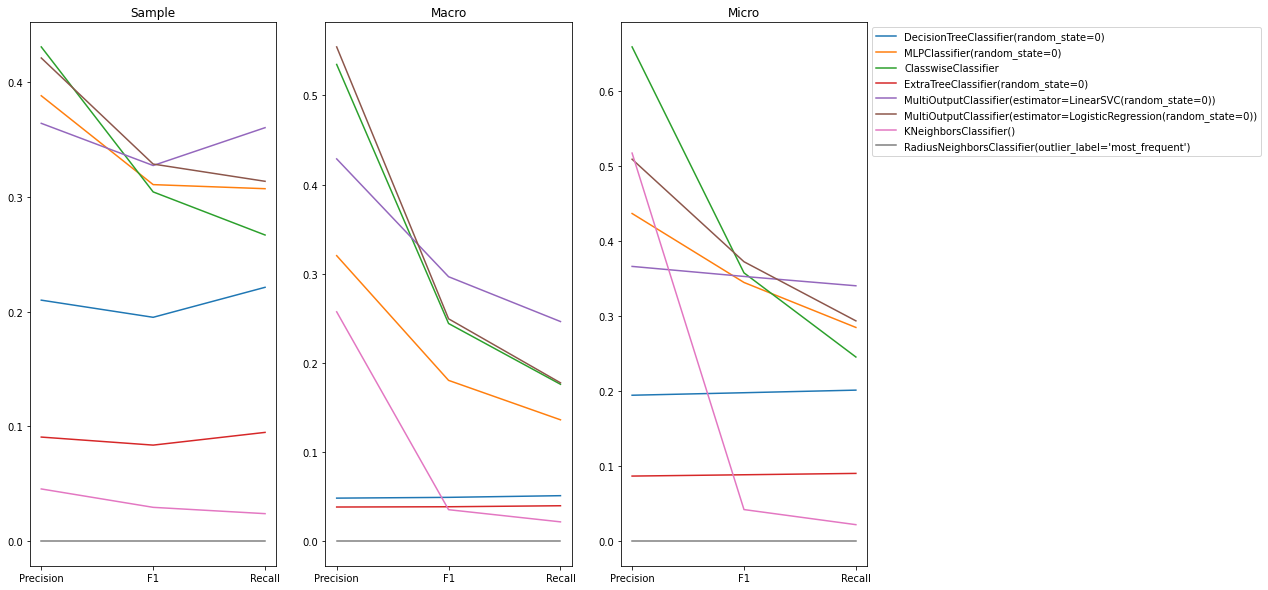

In [120]:
x_ = ['Precision', 'F1', 'Recall']
fig, axes = plt.subplots(1, 3, figsize=(15,10))
axes[0].set_title('Sample')
axes[1].set_title('Macro')
axes[2].set_title('Micro')
for eval_ in evals:
    evaluator = eval_[1]
    axes[0].plot(x_, [evaluator.precision_samples, evaluator.f1_samples, evaluator.recall_samples], label=eval_[0])
    axes[1].plot(x_, [evaluator.precision_macro, evaluator.f1_macro, evaluator.recall_macro], label=eval_[0])
    axes[2].plot(x_, [evaluator.precision_micro, evaluator.f1_micro, evaluator.recall_micro], label=eval_[0])
axes[2].legend(bbox_to_anchor=(1, 1), ncol=1)
plt.show()

In [132]:
top_3 = sorted(clf_paths, key=lambda x: load(x).evaluation.sum(), reverse=True)[:3]

In [153]:
from sklearn.metrics import classification_report
classwise_results = []
for clf_path in top_3:
    clf = load(clf_path)
    prediction = clf.predict(X_test)
    classwise_results.append((clf, classification_report(y_test, prediction, output_dict=True, zero_division=0)))

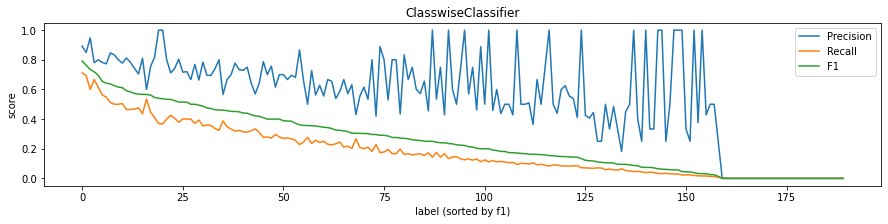

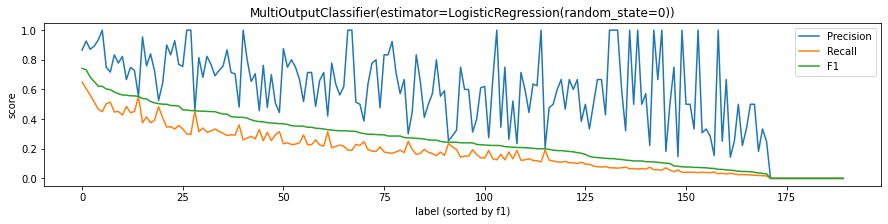

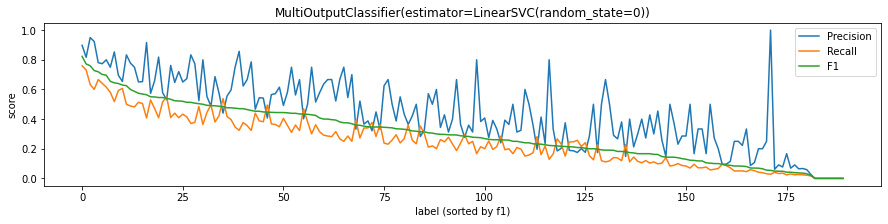

In [176]:
#print(classwise_results)
import numpy as np
x_ = np.arange(0, len(y_test[0]))
for classwise_result in classwise_results:
    name, results = classwise_result
    _, fig_1 = plt.subplots(figsize=(15,3))
    fig_1.set_title(name)
    sorted_results = sorted(results, key=lambda x: results[x]['f1-score'], reverse=True)
    fig_1.plot(x_, [results[result]['precision'] for result in sorted_results][0:len(x_)], label='Precision')
    fig_1.plot(x_, [results[result]['recall'] for result in sorted_results][0:len(x_)], label='Recall')
    fig_1.plot(x_, [results[result]['f1-score'] for result in sorted_results][0:len(x_)], label='F1')
    fig_1.set_xlabel('label (sorted by f1)')
    fig_1.set_ylabel('score')
    fig_1.legend(loc='best')
plt.show()